In [57]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [58]:
df_knn = pd.read_csv("df_thc_tfidf.csv")

In [59]:
df_knn

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Delta9-THC
0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.259712
1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,0.259712
2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,0.0,...,1,0,0,0,0,0,1,0,0,0.259712
3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0.259712
4,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0.259712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.562557
74996,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.562557
74997,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.562557
74998,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.562557


Splitting dependent and independent variables

In [61]:
X = df_knn.drop(['X..Delta9-THC'], axis = 1)
y = df_knn[['X..Delta9-THC']]

In [62]:
X.columns.to_list()

['tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',
 'tfidf_7

Plotting histograms on target variable

In [8]:
y_array = y.to_numpy()
y_array

array([[0.25971245],
       [0.25971245],
       [0.25971245],
       ...,
       [0.56255736],
       [0.56255736],
       [0.56255736]])

<AxesSubplot:ylabel='Count'>

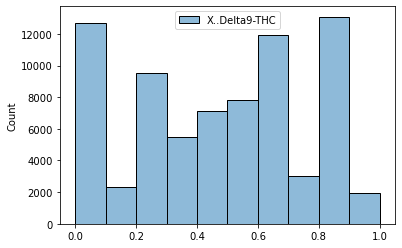

In [11]:
sns.histplot(y, bins = 10)

Train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [13]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [14]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [15]:
mean_absolute_error(y_val, y_pred_knreg)

0.1206847402591517

In [16]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7051750052433015

In [17]:
#val
r2_score(y_val, y_pred_knreg)

0.5054521083019843

Feature Selection

In [18]:
rfreg = RandomForestRegressor()

In [19]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [20]:
selector.estimator_.feature_importances_

array([8.33511315e-04, 9.14282450e-04, 5.14822768e-04, 3.82534543e-04,
       1.89826560e-03, 2.78430428e-03, 1.21863111e-03, 5.41456671e-03,
       2.59831318e-04, 6.78245747e-03, 6.67669566e-04, 4.38748694e-03,
       5.85353499e-04, 1.43659598e-03, 2.48796268e-03, 2.67143006e-03,
       2.23135056e-03, 1.36290074e-03, 7.17693888e-04, 9.23258538e-03,
       1.98451389e-03, 4.67503666e-03, 1.13530001e-03, 6.41302808e-04,
       6.54053362e-03, 4.42194938e-04, 1.55663624e-03, 9.83189889e-04,
       1.36848661e-03, 3.95882619e-04, 3.44859807e-03, 8.36243581e-04,
       4.52481581e-03, 7.39627023e-04, 1.24847546e-03, 1.15585311e-03,
       2.72288095e-04, 7.91350493e-03, 3.71403885e-04, 6.62331162e-03,
       8.40002470e-04, 1.13081401e-03, 2.82292585e-04, 6.54951891e-03,
       4.29903766e-04, 1.18019042e-03, 1.71720320e-03, 2.16048075e-04,
       3.09681496e-03, 5.30082767e-04, 1.88863744e-03, 4.46038536e-04,
       8.99596725e-04, 4.60857521e-04, 1.45101069e-03, 5.02797639e-04,
      

In [21]:
selector.threshold_

0.0021321961620469083

In [22]:
mask = selector.get_support()

In [23]:
mask

array([False, False, False, False, False,  True, False,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False,

In [24]:
selected_features = X.columns[mask]

In [25]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_9,tfidf_11,tfidf_14,tfidf_15,tfidf_16,tfidf_19,tfidf_21,tfidf_24,...,citrus,diesel,earthy,grape,lemon,orange,pine,pungent,sweet,vanilla
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.396758,...,0,0,0,0,0,0,0,0,0,1
2,0.000000,0.0,0.0,0.0,0.0,0.332053,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,1
3,0.145484,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0,0,0,1,0,0,1,0,0,0
4,0.145484,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
74996,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
74997,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
74998,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [26]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_7',
 'tfidf_9',
 'tfidf_11',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_19',
 'tfidf_21',
 'tfidf_24',
 'tfidf_30',
 'tfidf_32',
 'tfidf_37',
 'tfidf_39',
 'tfidf_43',
 'tfidf_48',
 'tfidf_67',
 'tfidf_73',
 'tfidf_78',
 'tfidf_80',
 'tfidf_90',
 'tfidf_93',
 'tfidf_98',
 'tfidf_104',
 'tfidf_108',
 'tfidf_110',
 'tfidf_117',
 'tfidf_119',
 'tfidf_121',
 'tfidf_128',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_154',
 'tfidf_158',
 'tfidf_159',
 'tfidf_162',
 'tfidf_164',
 'tfidf_166',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_176',
 'tfidf_178',
 'tfidf_180',
 'tfidf_181',
 'tfidf_199',
 'tfidf_200',
 'tfidf_207',
 'tfidf_210',
 'tfidf_217',
 'tfidf_228',
 'tfidf_229',
 'tfidf_230',
 'tfidf_239',
 'tfidf_245',
 'tfidf_246',
 'tfidf_251',
 'tfidf_253',
 'tfidf_258',
 'tfidf_267',
 'tfidf_270',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_291',
 'tfidf_292',
 'tfidf_294',
 'tfidf_295',
 'tfidf_303',
 'tfidf_309',
 'tf

In [27]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_thc.pkl")
joblib.dump(selector, "selector_knn_tfidf_thc.pkl")

['selector_knn_tfidf_thc.pkl']

Train test split (after Feature Selection)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [29]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [30]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [31]:
mean_absolute_error(y_val, y_pred_knreg)

0.1072414610348581

In [32]:
mean_squared_error(y_val, y_pred_knreg)

0.029661183253047507

In [33]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17222422376961816

In [34]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.7759142300161913

In [35]:
#val
r2_score(y_val, y_pred_knreg)

0.6388629514188581

Hyperparameter Tuning

In [36]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [37]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [38]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [39]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 13}

kNN (after hyperparameter tuning)

In [40]:
knreg_ht = KNeighborsRegressor(n_neighbors = 13, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [41]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.04332316803863097

In [42]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.013699410062066692

In [43]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.11704447899011167

In [44]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9747914299908035

In [45]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8332040743314159

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [46]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [65]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_thc.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_thc.pkl")

['y_test_knreg_tfidf_thc.pkl']

In [47]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.0439011728197422

In [48]:
r2_score(y_test, y_pred_knreg_test)

0.8325400143992909

In [49]:
mean_squared_error(y_test, y_pred_knreg_test)

0.013780310321693622

In [50]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.11738956649418901

In [51]:
y_test

,X..Delta9-THC
11591,0.807281
52020,0.012389
34666,0.246406
22169,0.030284
23049,1.000000
...,...
60863,0.831753
32316,0.566840
60933,0.831753
43206,0.602325


In [52]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

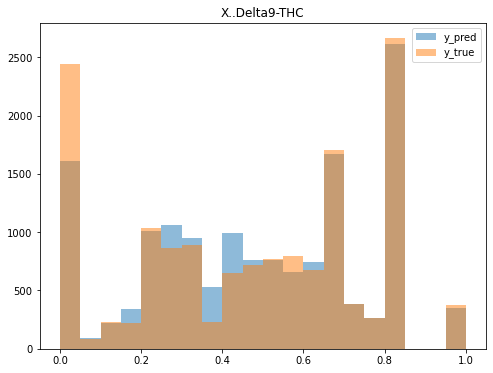

<Figure size 432x288 with 0 Axes>

In [56]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Delta9-THC"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_thc.png')

Pearson R

In [63]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.914
P-value: 0.000


<AxesSubplot:>

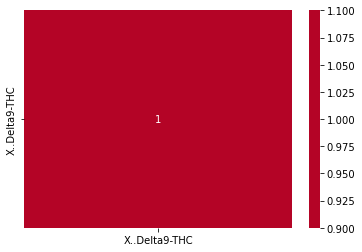

In [64]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)